In [1]:
import numpy as np
import pandas as pd
import random, os, time, csv, warnings, math, sktime
from sklearn import metrics, decomposition, discriminant_analysis
from scipy import stats, special, optimize
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore') # AMI warning
from sktime.utils.data_io import load_from_tsfile_to_dataframe

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from preprocess_utils import *
from postprocess_utils import *
from vis import *
from literature_models import *
from fit import *
from femda import *
from run_experiments import run_algorithms as run_all
from run_experiments import test_models as test_all
from run_experiments import NUMBER_OF_ALGORITHMS,NUMBER_OF_MEASURES_REAL,NUMBER_OF_MEASURES_SYNTH,NUMBER_OF_RUNS

In [4]:
DATA_PATH = os.path.join(os.path.dirname(sktime.__file__),"datasets/data")# "..\data\MTSC")

In [5]:
read_heartbeat_train, heartbeat_labels_raw = load_from_tsfile_to_dataframe(
    os.path.join(DATA_PATH, "Heartbeat/Heartbeat_TRAIN.ts")
)
read_heartbeat_test, heartbeat_test_labels_raw = load_from_tsfile_to_dataframe(
    os.path.join(DATA_PATH, "Heartbeat/Heartbeat_TEST.ts")
)

In [6]:
def Dataset2Flatten(features, labels):
    return features.agg(lambda x:pd.concat(list(x)), axis=1), pd.factorize(labels)[0]

In [7]:
np.random.seed(44)
random.seed(44)
heartbeat_data,heartbeat_labels_raw = Dataset2Flatten(read_heartbeat_train, heartbeat_labels_raw)
heartbeat_test_data,heartbeat_test_labels_raw = Dataset2Flatten(read_heartbeat_train, heartbeat_labels_raw)

In [8]:
NUMBER_OF_RUNS = 30
result_book_heartbeat = np.zeros((NUMBER_OF_ALGORITHMS,NUMBER_OF_MEASURES_REAL,NUMBER_OF_RUNS))
for i in range(NUMBER_OF_RUNS):
    #Sample and PCA
    selected_digits = [0,1]
    n_pca = (i+1)*5
    heartbeat_pca, heartbeat_labels, heartbeat_raw, ve, pca = import_subset(heartbeat_data, heartbeat_labels_raw, selected_digits, n_pca, -1)
    heartbeat_test_pca, heartbeat_test_labels, heartbeat_test_raw,_,_2 = import_subset(heartbeat_test_data, heartbeat_test_labels_raw, selected_digits, n_pca, -1, pca=pca)
        
    #Run models (outlier rejection: change percent_outliers)
    models, result_book_heartbeat[:,:,i] = run_all(heartbeat_pca, heartbeat_labels, heartbeat_test_pca, heartbeat_test_labels, percent_outliers=0, conf=False, verbose=True, return_results=True)

LDA
N 204 Accuracy 0.7451 ARI 0.09291 AMI 0.05768
QDA
N 204 Accuracy 0.69118 ARI 0.12633 AMI 0.06054
RQDA-MCD
RGQDA-MCD
t-QDA
N 204 Accuracy 0.7598 ARI 0.22553 AMI 0.11098
FEMDA with p/trace
N 204 Accuracy 0.70588 ARI 0.0756 AMI 0.01681
FEMDA pre-normalised
N 204 Accuracy 0.61275 ARI -0.03061 AMI 0.00061
LDA
N 204 Accuracy 0.7598 ARI 0.1453 AMI 0.09226
QDA
N 204 Accuracy 0.7402 ARI 0.1559 AMI 0.06309
RQDA-MCD
RGQDA-MCD
t-QDA
N 204 Accuracy 0.76471 ARI 0.25661 AMI 0.1462
FEMDA with p/trace
N 204 Accuracy 0.7402 ARI 0.20181 AMI 0.10206
FEMDA pre-normalised
N 204 Accuracy 0.64216 ARI 0.07656 AMI 0.09581
LDA
N 204 Accuracy 0.7598 ARI 0.1453 AMI 0.09226
QDA
N 204 Accuracy 0.76961 ARI 0.23373 AMI 0.11715
RQDA-MCD
RGQDA-MCD
t-QDA
N 204 Accuracy 0.81863 ARI 0.38745 AMI 0.25525
FEMDA with p/trace
N 204 Accuracy 0.81373 ARI 0.37375 AMI 0.2416
FEMDA pre-normalised
N 204 Accuracy 0.77451 ARI 0.29048 AMI 0.20246
LDA
N 204 Accuracy 0.77451 ARI 0.19684 AMI 0.12517
QDA
N 204 Accuracy 0.80392 ARI 0.317

ValueError: All-NaN slice encountered

In [9]:
%store result_book_heartbeat

Stored 'result_book_heartbeat' (ndarray)


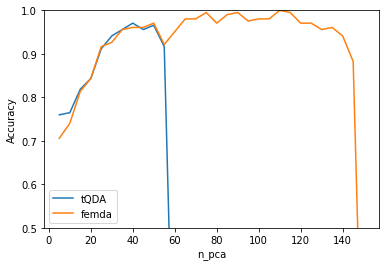

In [10]:
plot_tQDA_vs_FEMDA(result_book_heartbeat, xaxis=5*(np.arange(NUMBER_OF_RUNS)+1), ylim=[0.5,1])